# 30828562 Assignment 2: Ocean Gyre

In [1]:
from numerical_functions import *
import numpy as np
import matplotlib.pyplot as plt
from analytical_functions import *
from numerical import *
from jax_numerical import *
from analytical import *

Wind driven circulation in an closed ocean basin was described by Stommel (1948) as a homogenous rectangle under the influence of wind stress, horizontal pressure gradients and Coriolis force. The basin is assumed to have a free upper surface and a solid lower boundary at constant depth H, when at rest. When the surface is disturbed, variations in the height of the free surface can be described as $\eta$, away from the height at rest.
We can linearise the shallow water equations about a resting state and consider liner wind stress such that:

$\frac{\partial{\eta}}{\partial{t}} + H \nabla  \cdot$**V**$ =0$

$\frac{\partial{V}}{\partial{t}} + (f_0 + \beta y)$**k**$ \times $**V**$ = -g\nabla \eta - \gamma $**V**$ + \frac{\tau}{\rho H}$

where:<br>
**x**$=(x,y)$ <br>
$H$ is the resting height of the basin <br>
$f_0 +\beta y$ is the Coriolis parameter on a $\beta$-plane <br>
**k** is the unit vector <br>
$g$ is the gravitational constant <br>
$\gamma$ is the linear drag coefficient <br>
$\rho$ is the density (assumed constant) <br>
$\tau$ is the wind stress on the basin surface 

We can specify the parameters of our ocean basin such that:<br>
$L = 10^6$<br>
$f_0 = 10^{-4}s^{-1}$<br>
$\beta = 10^{-11}m^{-1}s^{-1}$<br>
$g = 10ms^{-2}$<br>
$\gamma = 10^{-6}s^{-1}$<br>
$\rho =1000kgm^{-3}$<br>
$H=1000m$

and can calculate $\tau$ from:<br>
$\tau_x = \tau_0(-cos(\frac{\pi y}{L}))$<br>
$\tau_y=0$<br>
where $\tau_0=0.2Nm^{-2}$

# Task A

This model can support both Gravity and Kelvin waves. If we assume the worst case scenario we must use short gravity waves in our calculations of the CFL criterion. We assume that these waves are spawned by the wind stress on the free surface.

To choose our grid we must compute $\frac{R_D}{d}$:<br>
$R_D = \frac{\sqrt{gH}}{f_0}=\frac{\sqrt{10 \times 10^3}}{10^{-4}}=10^6$<br>
<br>
$\frac{R_D}{d} = \frac{10^6}{25,000} = 40$<br>

As $R_D >> d$ we are working with a fine grid. Looking to the lecture notes we see that the best grid for our fine grid gravity wave problem is Arakawa grid C.

# Task C

In this section we are trying to recreate the analytical solution proposed by Mushgrave (1985). The equations for steady state are given below:<br>
<img src="analytical_eq.png" width=600 height=600 /> <br>
The constant of integration was obtained from the final value of $\eta(0,L/2)$ in Task D.2.

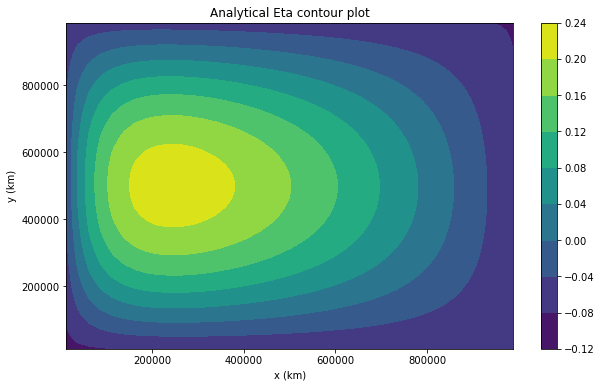

In [2]:
#analytical_plot()
fwdbwd('C')

In this figure we can see an ocean gyre. The formation of a western boundary current is expected as the Coriolis force causes the gyre to rotate in a clockwise direction, producing anticyclonic motion (assuming we are in the Northern Hemisphere). The figure shows a maximum positive height anomaly just west of the centre of the basin, which decreases in magnitude until the height anomaly becomes negative near the boundaries. This figure will be used as a benchmark for the rest of our modelling. We will compare the output of our numerical models to the above figure to evaluate the accuracy of the numerical solution.

# Task D

In this section we aim to create a finite difference forward-backward time scheme (Matsuno, 1966; Beckers and Deleersnijder, 1993) on an Arakawa-C grid which alternates the order of the solution of the momentum equations between time steps: First $u$ is calculated before $v$:<br>
<img src="num_eqs1.png" width=600 height=600 /> <br>
And then $v$ is calculated before $u$
<img src="num_eqs2.png" width=600 height=600 /> <br>
And then the cycle restarts as a loop.

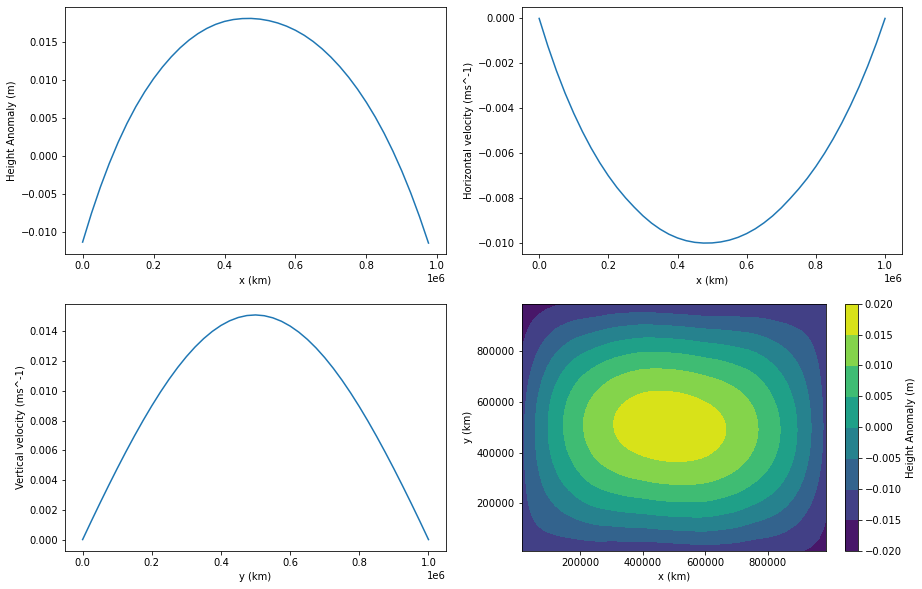

In [3]:
fwdbwd('D1')

For this task we ran the forward-backward scheme for one day and have produced a series of plots showing $u$, $v$, and $\eta$. As can be seen in the $\eta$ elevation plot, the simulation is still early in the timeframe and has not yet reached steady state. An oval height anomaly has started to form, with wobbly edges that suggest movement of the gyre. The model shows stability when run for one day and the velocity plots show that the gyre is moving in a smooth clockwise direction. 

CPU times: user 3.27 s, sys: 40 ms, total: 3.31 s
Wall time: 3.37 s


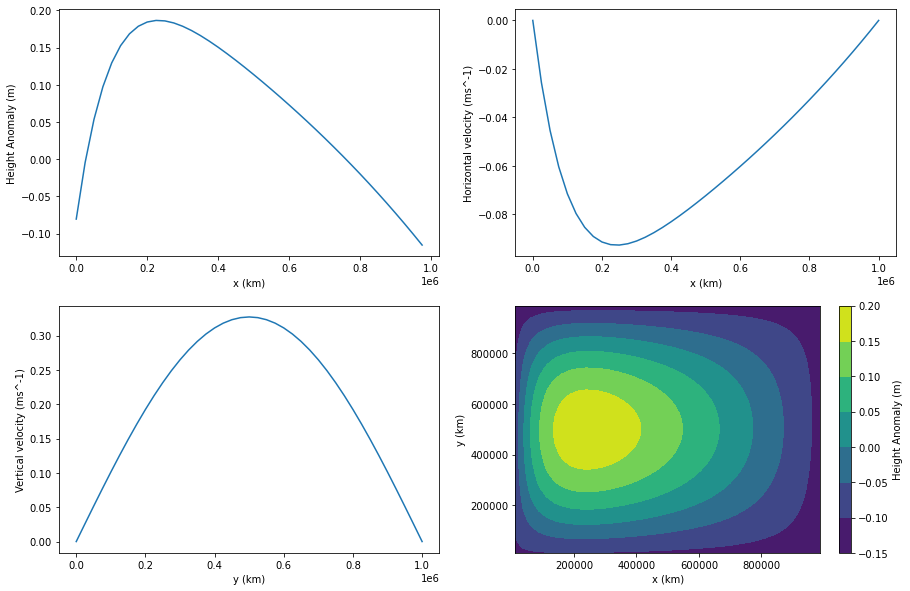

In [4]:
%%time
fwdbwd('D2')

We have increased the timeframe of the simulation up to 40 days, which has been obtained through the energy method in Task E.2. The model is still shown to be stable. We can once again see the clockwise motion of the gyre but the height anomaly maximum has now shifted just west of the centre of the basin, as seen in the analytical solution. The $\eta$ plot is similar to that of the analytical plot in general shape and magnitude, although the numerical scheme slightly underpredicts the maximum value of $\eta$, and underpredicts the gradient of the height anomaly.

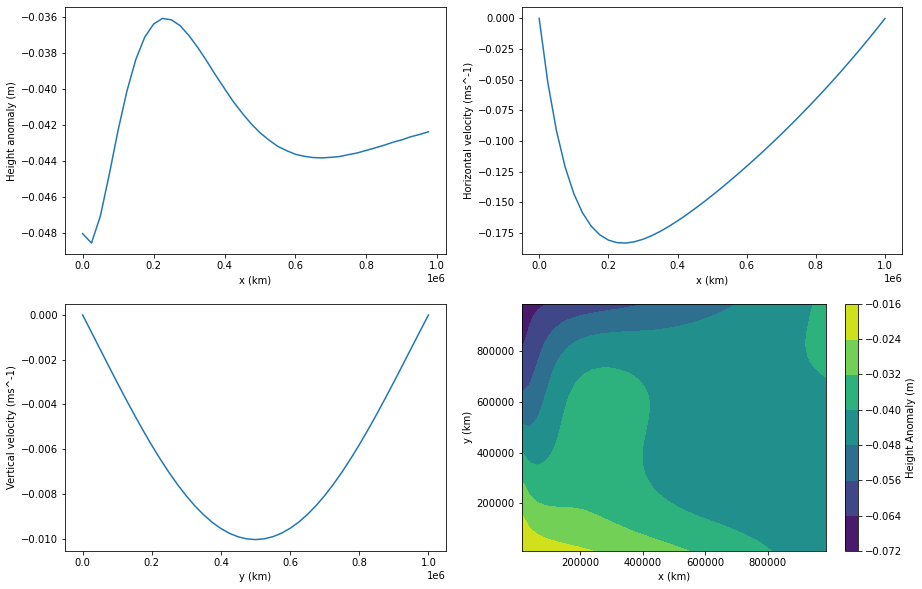

In [5]:
fwdbwd('D3')

The above figures show the difference between the analytical and numerical solutions. It can be seen that the greatest disparity between the velocities occurs where $\eta$ has maximum magnitude. $\eta$ itself has the greatest variation in the North Western corner of the basin where the boundary current curves East. It can be seen from the scale on the plot of $\eta$ elevation that the numerical model underpredicts compared to the analytical solution, as seen in Task D.2. Overall, the numerical model produces a good solution of the ocean gyre problem with a maximum inaccuracy of 30% in the North West corner.

# Task E

We can calculate the energy of the perturbation from the resting ocean with the following equation:<br>
<img src="energy.png" width=300 height=200 /> <br>
We can use these energy calculations to find when our solution reaches a steady state.

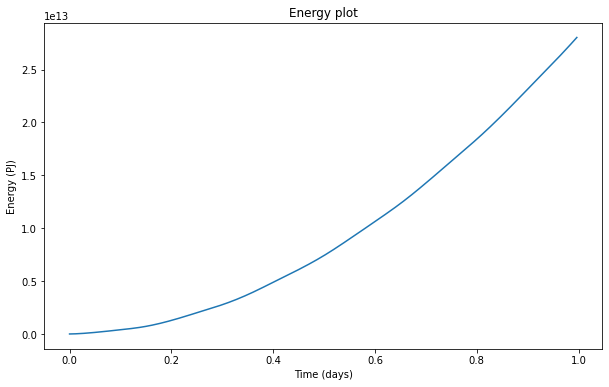

In [6]:
fwdbwd('E1')

First we are running the energy integration for one day to see how it changes with time. By the end of the solution the energy of the solution is still increasing so we should increase the time of the model to aim for a steady state solution.

Energy difference between the analytical and numerical solutions: 4.090307e+15


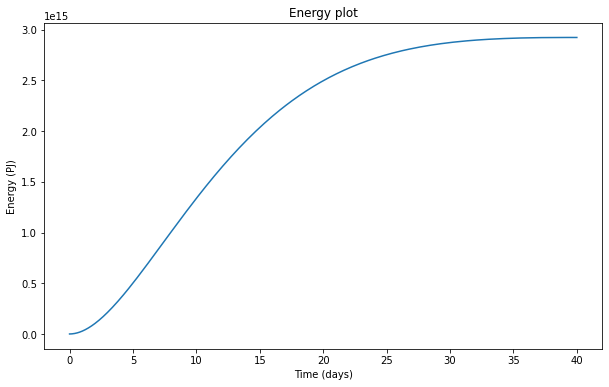

In [7]:
fwdbwd('E2')

Here, we have run the solution until steady state at 40 days. As can be seen in the figure, the energy of the numerical solution increases until it plateaus, indicating the solution has reached its steady state. We can then take this time of 40 days and use it in earlier tasks such as D to compute our numerical solution.

In [8]:
fwdbwd('E3')

Energy difference between the analytical and numerical solutions: 4.095339e+15


We are now investigating how changing the size of the spacial step effects the energy of the numerical solution. In the above simulation we have run the model at double resolution in space, and adjusted the timestep according to the 2D CFL criterion. We have used values of $\Delta x$ and $\Delta y=12500m$ and $\Delta t = 50s$.

# Task G4 - Runge Kutta

For this task we have implemented a Runge-Kutta 4 solution, similar to that of Assignment 1. This has added benefits of being able to run at longer timesteps, for which we have chosen $\Delta t=200s$, much longer than that of the Matsuno forward-backward scheme. The scheme is also more accurate, as it runs with 4th order accuracy compared the 1st order for the FB scheme. However, the RK4 scheme takes much longer to run in spite of increasing the timestep; $10.9 s$ vs $3.19 s$, when compared to the Matsuno forward-backward scheme.

CPU times: user 11.4 s, sys: 54.7 ms, total: 11.4 s
Wall time: 11.5 s


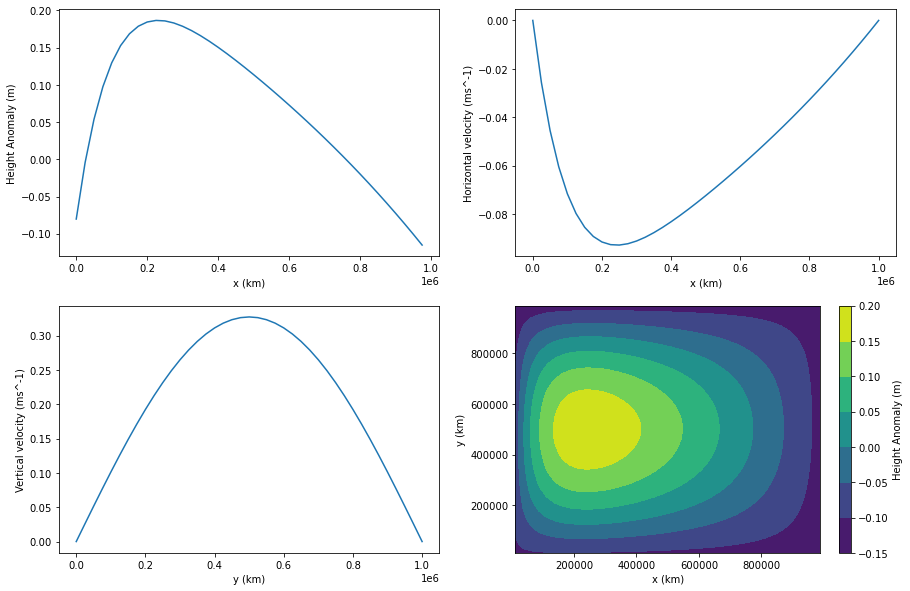

In [9]:
%%time
RK4()

# Jax implementation

CPU times: user 8.53 s, sys: 141 ms, total: 8.67 s
Wall time: 8.8 s


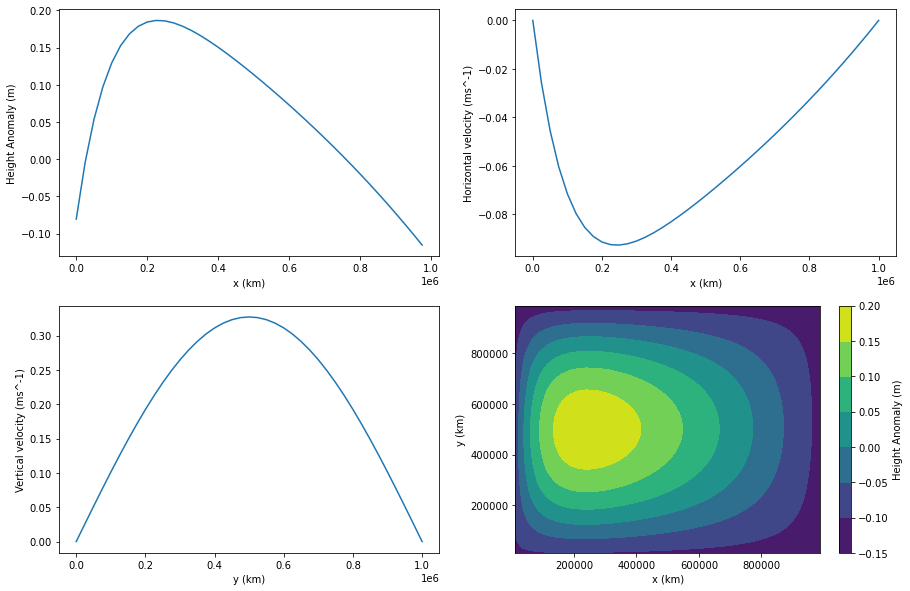

In [10]:
%%time
jax_fwdbwd('D2')

For this extension, we have investigated the use of Jax when running our FB scheme. As can be seen above, the figures are the same as previously as Jax does not change the schemes accuracy, rather optimises the implementation through use of the computer GPU. However, when timing this implementation, the scheme takes $7.97s$, over double the time of the original FB scheme.

# References

Beckers, J. and Deleersnijder, E. (1993). Stability of a FBTCS scheme applied to the propagation of shallow-water inertia-gravity waves on various grids. *J. Computational Phys.*, **108**, 95–104.<br>
Matsuno, T. (1966). Numerical simulation of the primitive equations by a simulated backward difference method. *J. Meteorol. Soc. Japan*, **44**, 76–84.<br>
Mushgrave, D. (1985). A numerical study of the roles of subgyre-scale mixing and the western boundary current on homogenisation of a passive tracer. *J. Geophys. Res.*, **90**, 7037-7043.<br>
Stommel, H. (1948), The westward intensification of wind-driven ocean currents. *Trans. Am. Geophys. Union*, **29**, 202-206.